# Récupération des données de mobilité humaines

> Ce Notebook présente les données de mobilités humaines depuis le début de la pandémie.

> Les données de mobilités humaines sont fournies par Google et accessibles à l'adresse suivante : https://www.google.com/covid19/mobility/. Les informations complémentaires concernant les données mises à disposition sont disponibles à l'adresse suivante : https://www.google.com/covid19/mobility/data_documentation.html?hl=fr. Les données de mobilités commencent à partir du **15 Février 2020**.  La référence (0%) est faite sur la valeur médiane des données entre le **03 Janvier 2020** et le **06 Février 2020**.

## Importation des modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from seismic_noise import *

## Paramètres initiaux

In [2]:
data_path = "DATA/google_mobility"
download = True
tags = {
    "2020-03-17":"Confinement 1",
    "2020-05-11":"Déconfinement",
    "2020-10-30":"Confinement 2",
    "2020-12-15":"Confinement 1",
    "2021-04-03":"Confinement 3",
    "2021-05-03":"Déconfinement"
}
dates_tags = [key for key in tags.keys()]
dates_tags = pd.to_datetime(dates_tags)

## Récupération des données de mobilité

Récupération des données au moyen de la fonction `load_google_mobility()` située dans le module `seismic_noise` à la racine du répertoire.

In [3]:
# Création et préparation des dossiers
if os.path.isdir(data_path):
    if download==True:
        filelist = [ f for f in os.listdir(data_path) ]
        for f in filelist:
            try:
                os.remove(os.path.join(data_path, f))
            except:
                pass
else:
    os.makedirs(data_path)
    
# Téléchargement des données
data = load_google_mobility(download_data=True)

#### Récupération des données sur le territoire

In [4]:
data_country = load_google_mobility(data_path, data_type = "country")
data_country

sub_region_1 sub_region_2  retail_and_recreation  \
date                                                          
2020-02-15          NaN          NaN                   -2.0   
2020-02-16          NaN          NaN                    6.0   
2020-02-17          NaN          NaN                    1.0   
2020-02-18          NaN          NaN                    5.0   
2020-02-19          NaN          NaN                   -4.0   
...                 ...          ...                    ...   
2021-07-27          NaN          NaN                    5.0   
2021-07-28          NaN          NaN                   -1.0   
2021-07-29          NaN          NaN                    1.0   
2021-07-30          NaN          NaN                   -4.0   
2021-07-31          NaN          NaN                  -14.0   

            grocery_and_pharmacy  parks  transit_stations  workplaces  \
date                                                                    
2020-02-15                  -1.0   23.0              12.0        -2.0   
2020-02-16                   2.0    9.0               7.0        -1.0   
2020-02-17                   2.0   16.0              -6.0       -15.0   
2020-02-18                   2.0   36.0              -4.0       -14.0   
2020-02-19                  -3.0   18.0              -6.0       -12.0   
...                          ...    ...               ...         ...   
2021-07-27                  26.0  174.0             -12.0       -34.0   
2021-07-28                  22.0  172.0              -9.0       -31.0   
2021-07-29                  24.0  185.0              -9.0       -34.0   
2021-07-30                  18.0  137.0              -4.0       -35.0   
2021-07-31                   9.0  109.0              22.0        -5.0   

            residential  
date                     
2020-02-15         -1.0  
2020-02-16         -1.0  
2020-02-17          4.0  
2020-02-18          3.0  
2020-02-19          2.0  
...                 ...  
2021-07-27          6.0  
2021-07-28          4.0  
2021-07-29          4.0  
2021-07-30          6.0  
2021-07-31         -2.0  

[533 rows x 8 columns]

In [5]:
# Création et préparation des dossiers
if os.path.isdir(data_path):
    if os.path.isfile(data_path + "/data.zip"):
        filelist = [ f for f in os.listdir(data_path) ]
        for f in filelist:
            if (f != '2020_FR_Region_Mobility_Report.csv') & (f != '2021_FR_Region_Mobility_Report.csv'):
                try:
                    os.remove(os.path.join(data_path, f))
                except:
                    pass

#### Récupération des données par région

In [6]:
data_region = load_google_mobility(data_type="region")
data_region

sub_region_1 sub_region_2  retail_and_recreation  \
date                                                                         
2020-02-15        Auvergne-Rhône-Alpes          NaN                    5.0   
2020-02-16        Auvergne-Rhône-Alpes          NaN                   15.0   
2020-02-17        Auvergne-Rhône-Alpes          NaN                    2.0   
2020-02-18        Auvergne-Rhône-Alpes          NaN                    8.0   
2020-02-19        Auvergne-Rhône-Alpes          NaN                   -1.0   
...                                ...          ...                    ...   
2021-07-27  Provence-Alpes-Côte d'Azur     Vaucluse                   30.0   
2021-07-28  Provence-Alpes-Côte d'Azur     Vaucluse                   23.0   
2021-07-29  Provence-Alpes-Côte d'Azur     Vaucluse                   26.0   
2021-07-30  Provence-Alpes-Côte d'Azur     Vaucluse                   16.0   
2021-07-31  Provence-Alpes-Côte d'Azur     Vaucluse                    6.0   

            grocery_and_pharmacy  parks  transit_stations  workplaces  \
date                                                                    
2020-02-15                   6.0   53.0              34.0         2.0   
2020-02-16                  15.0   44.0              18.0         1.0   
2020-02-17                   6.0   22.0               5.0         1.0   
2020-02-18                   7.0   56.0               8.0         2.0   
2020-02-19                   4.0   19.0               4.0         1.0   
...                          ...    ...               ...         ...   
2021-07-27                  44.0  327.0              46.0       -24.0   
2021-07-28                  37.0  283.0              54.0       -20.0   
2021-07-29                  34.0  263.0              46.0       -23.0   
2021-07-30                  36.0  254.0              88.0       -24.0   
2021-07-31                  32.0  206.0             237.0         6.0   

            residential  
date                     
2020-02-15         -1.0  
2020-02-16         -1.0  
2020-02-17          2.0  
2020-02-18          0.0  
2020-02-19          1.0  
...                 ...  
2021-07-27          3.0  
2021-07-28          2.0  
2021-07-29          3.0  
2021-07-30          3.0  
2021-07-31         -1.0  

[58086 rows x 8 columns]

## Affichage des données sur la France entière

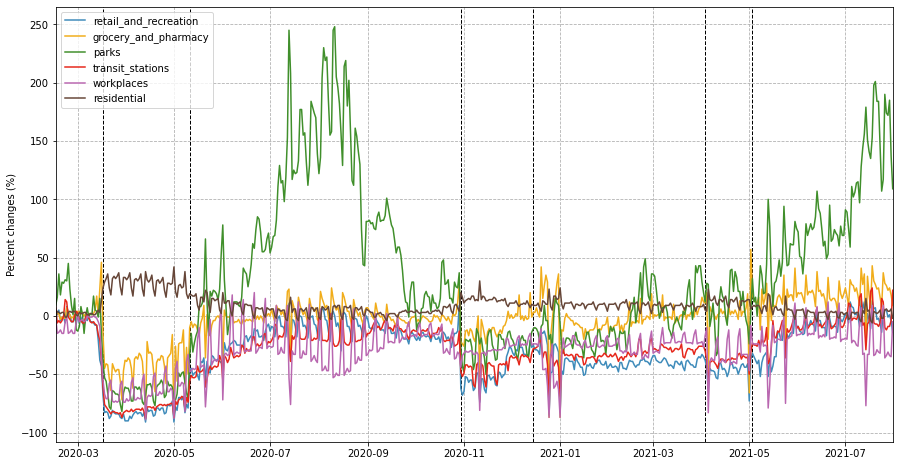

In [7]:
colors = ["#3E8BBA", "#F1AD1A", "#408F2B", "#E6261A", "#B967B0", "#664638"]
plt.figure(figsize=(15,8))
plt.plot(data_country.index, data_country["retail_and_recreation"], label="retail_and_recreation", color=colors[0])
plt.plot(data_country.index, data_country["grocery_and_pharmacy"], label="grocery_and_pharmacy", color=colors[1])
plt.plot(data_country.index, data_country["parks"], label="parks", color=colors[2])
plt.plot(data_country.index, data_country["transit_stations"], label="transit_stations", color=colors[3])
plt.plot(data_country.index, data_country["workplaces"], label="workplaces", color=colors[4])
plt.plot(data_country.index, data_country["residential"], label="residential", color=colors[5])
[plt.axvline(dates_tags[i], color="black", ls="--", lw=1, zorder=0) for i in range(len(dates_tags))]
plt.legend()
plt.ylabel("Percent changes (%)")
plt.grid(ls='--')
plt.xlim(data_country.index[1], data_country.index[-1])
plt.show()

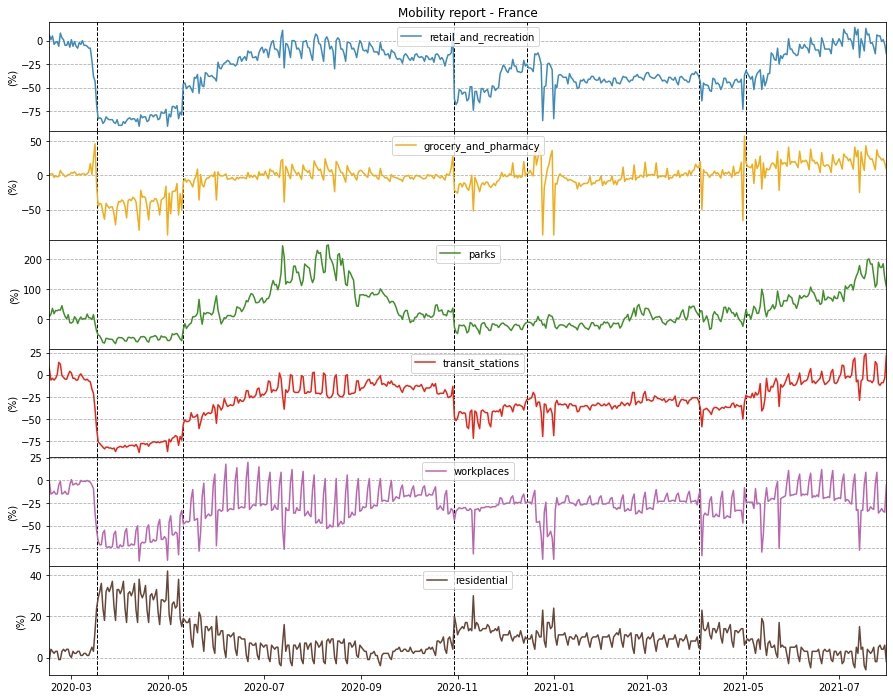

In [8]:
labels = data_country.columns[2:]
N = len(labels)

fig = plt.figure(figsize=(15, 2*N))

for i, label in enumerate(data_country.columns[2:]):
    ax = fig.add_subplot(N,1,i+1)
    ax.plot(data_country.index, data_country[label], color=colors[i], label=label)
    ax.set_ylabel("(%)")
    ax.grid(axis="y", ls='--')
    ax.legend(loc=9)  
    ax.set_xlim(data_country.index[1], data_country.index[-1])
    [plt.axvline(dates_tags[i], color="black", ls="--", lw=1, zorder=0) for i in range(len(dates_tags))]
    if i+1 != N: ax.axes.xaxis.set_visible(False)
    if i == 0: ax.set_title("Mobility report - France")
        
fig.subplots_adjust(hspace=0)
plt.show()

## Affichage des données par région

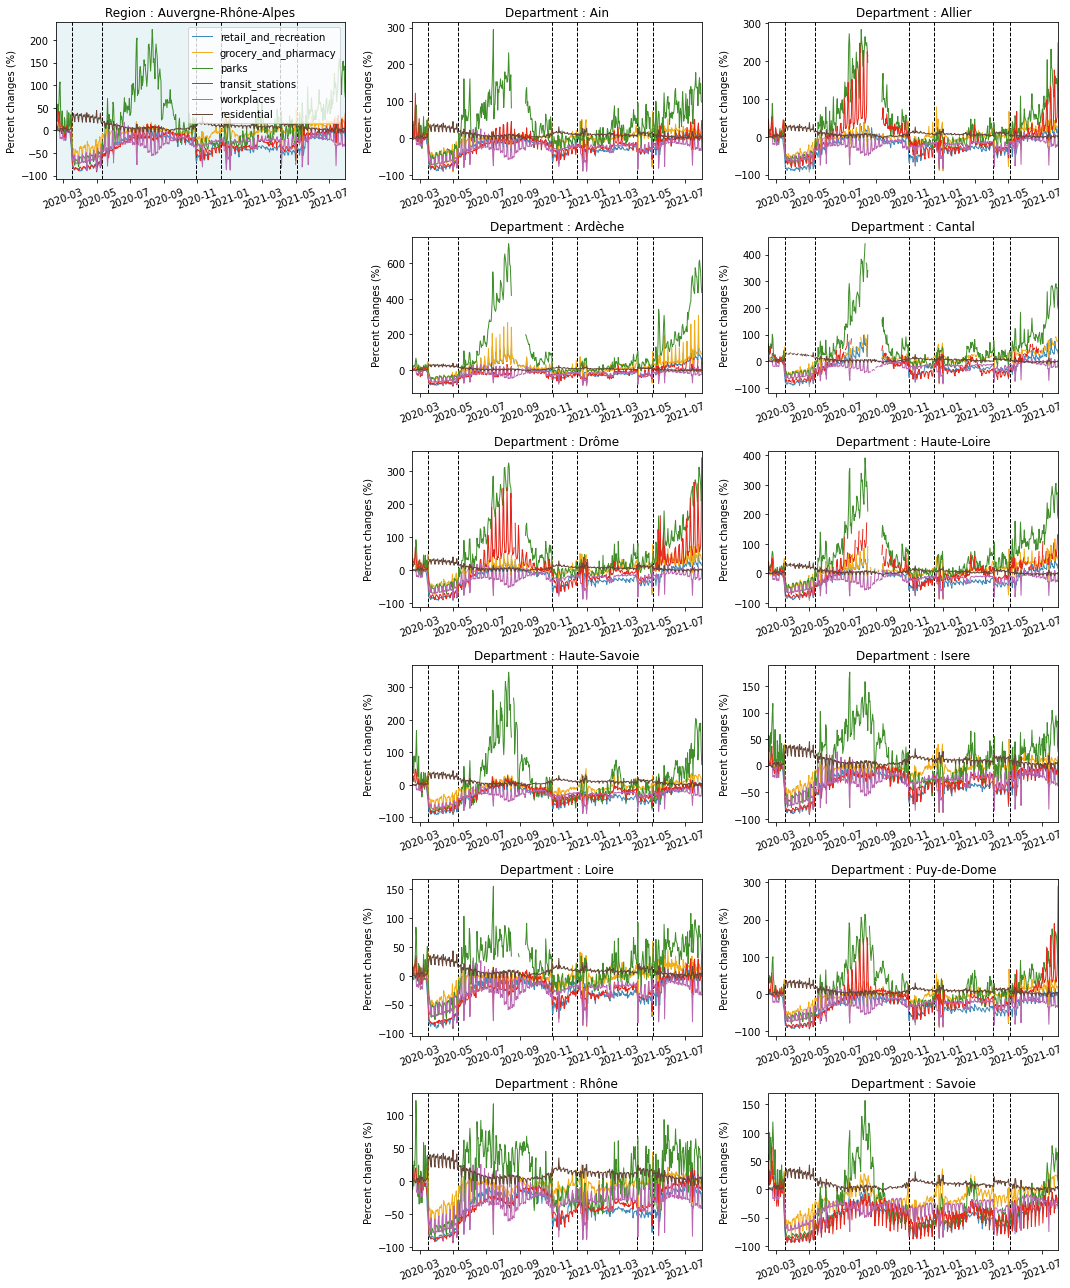

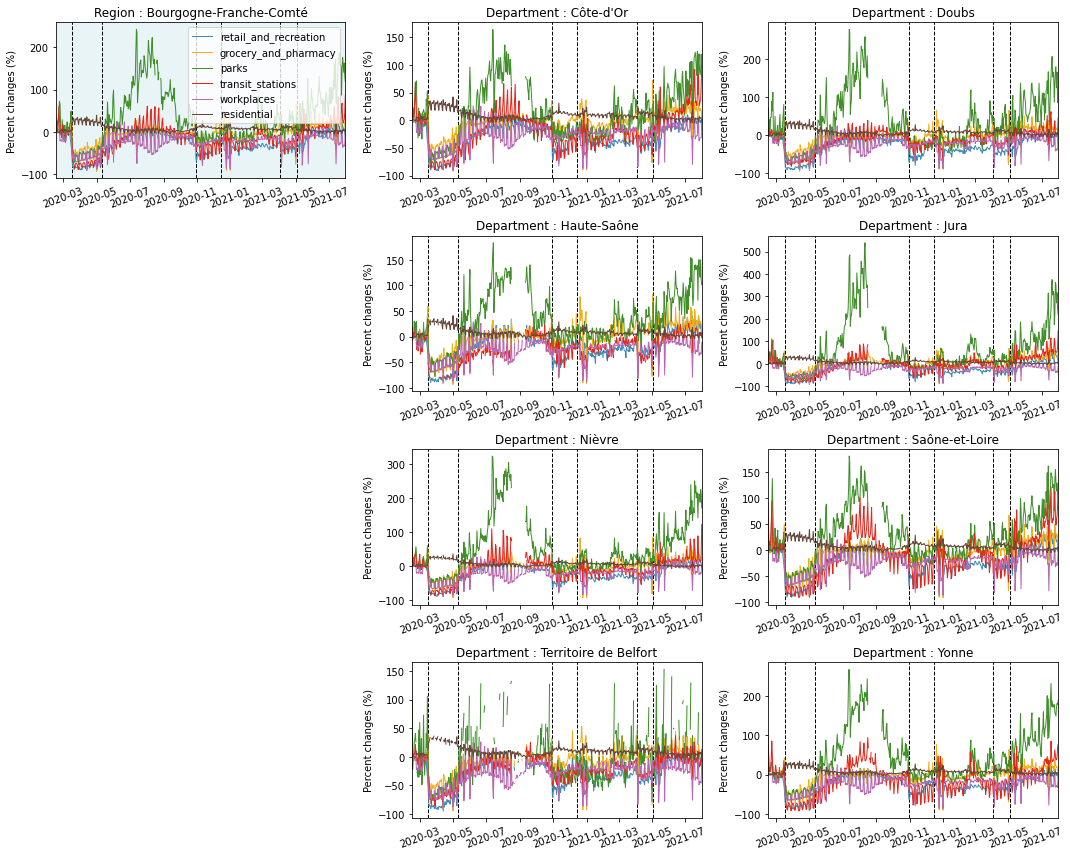

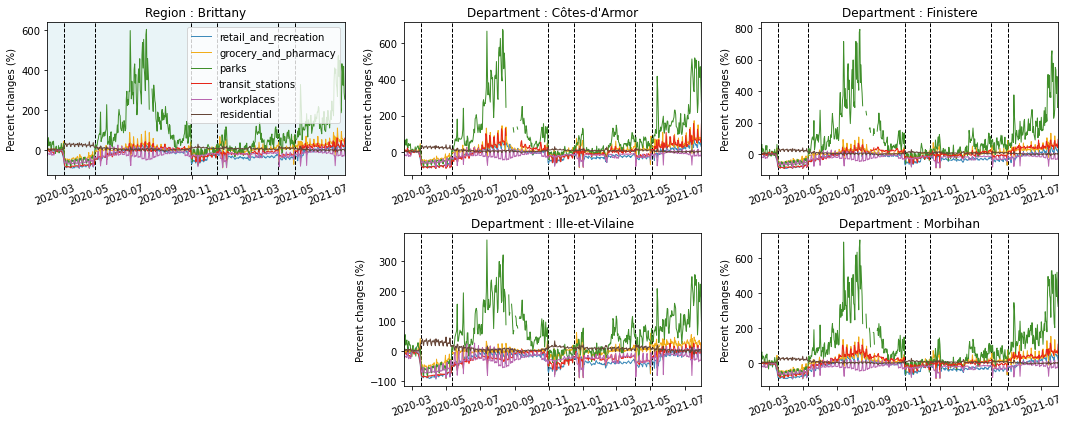

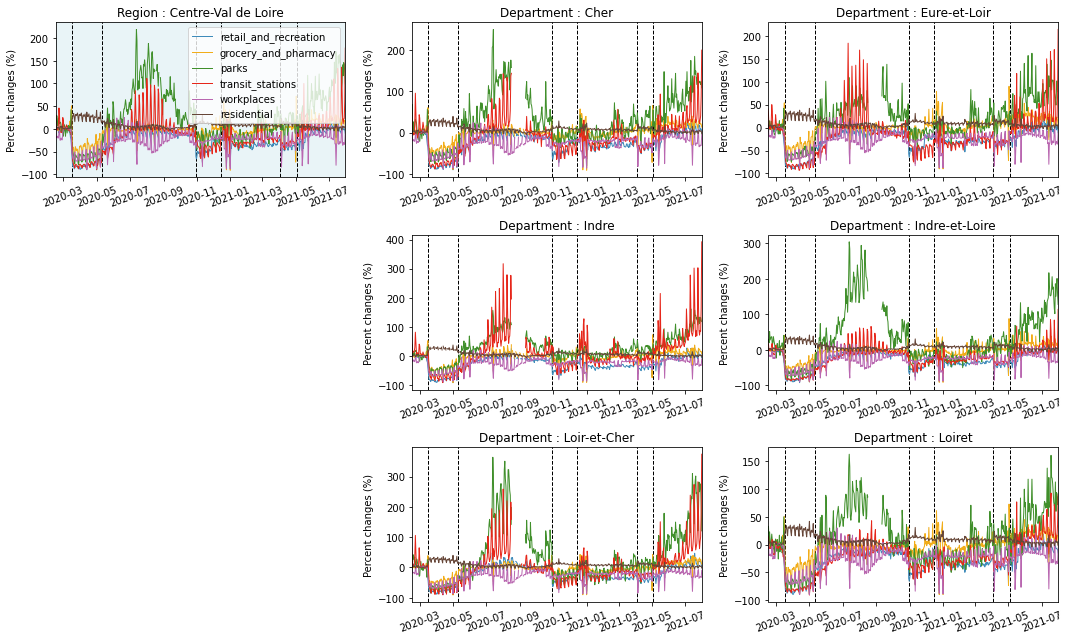

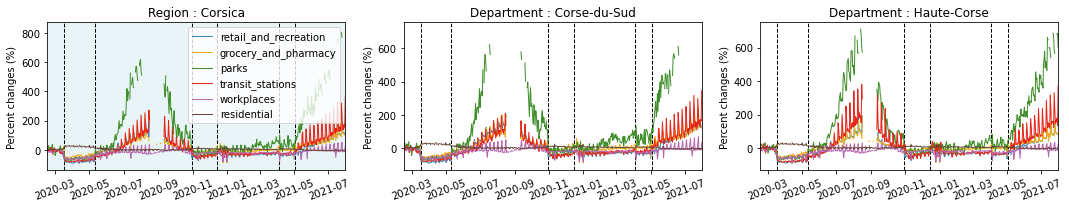

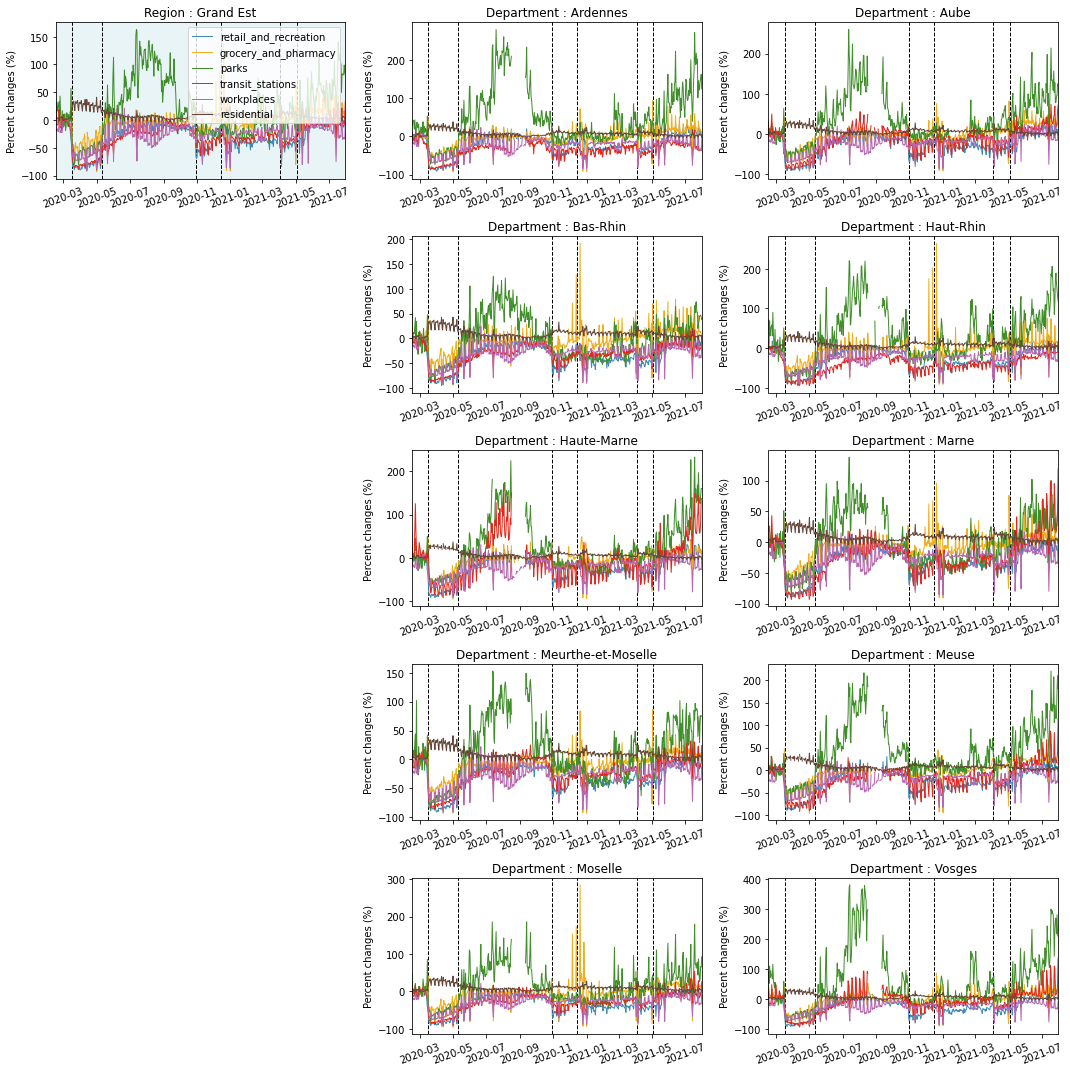

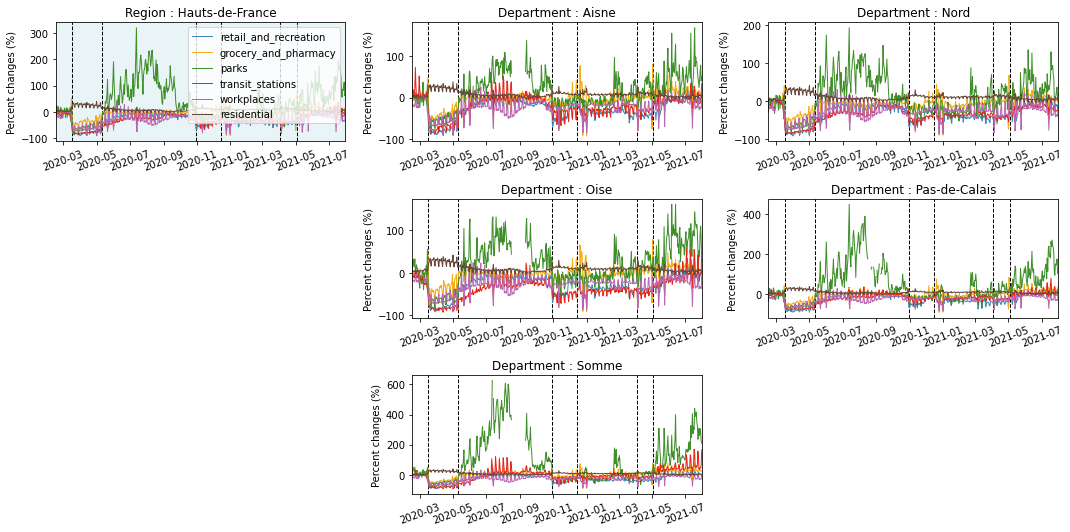

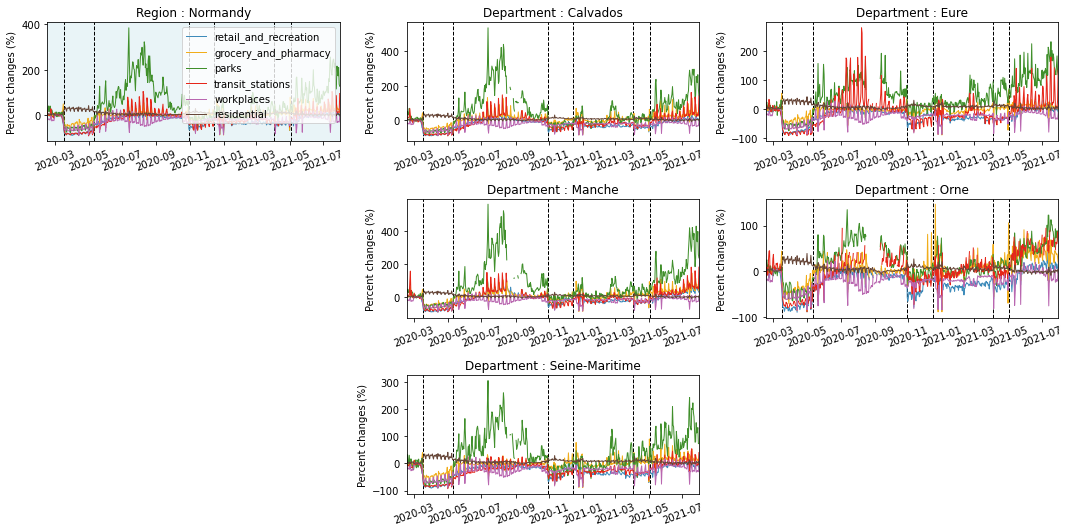

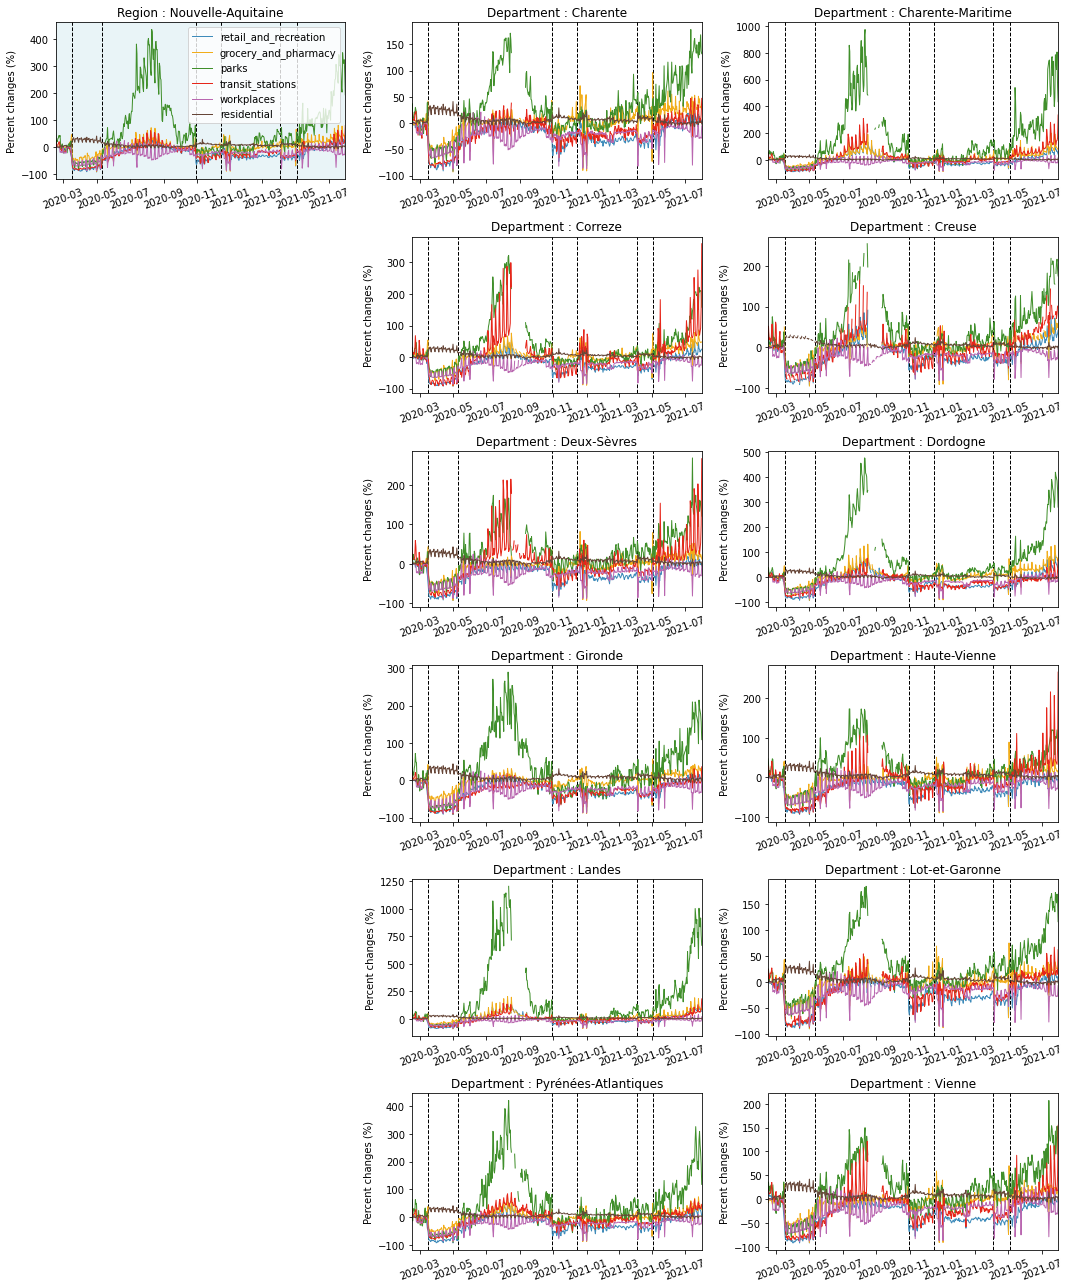

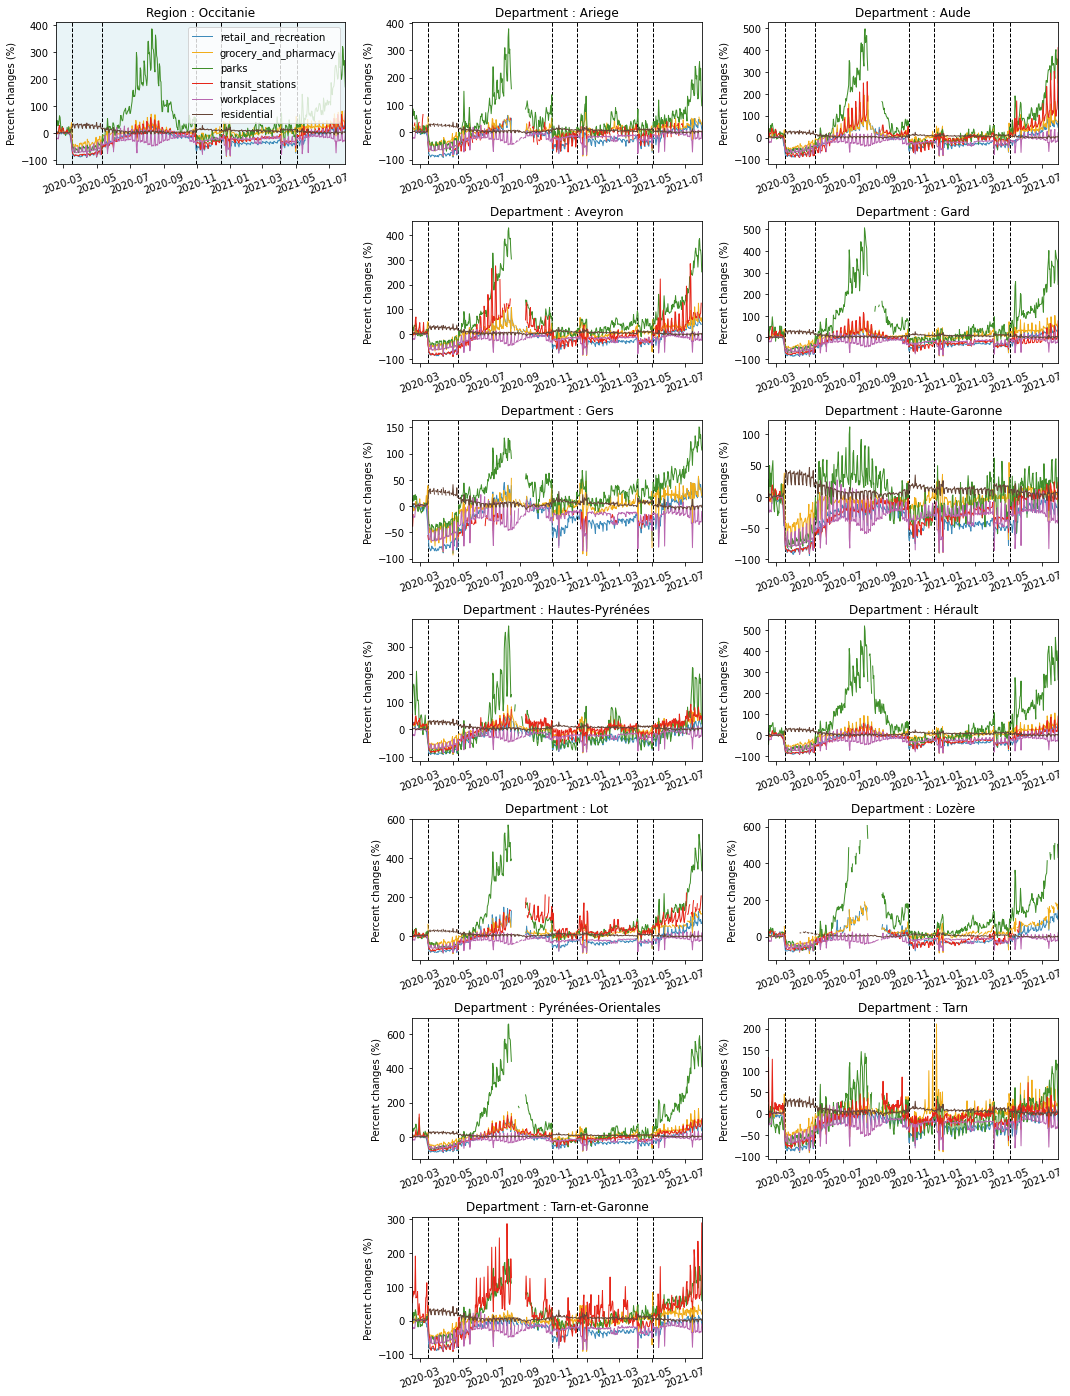

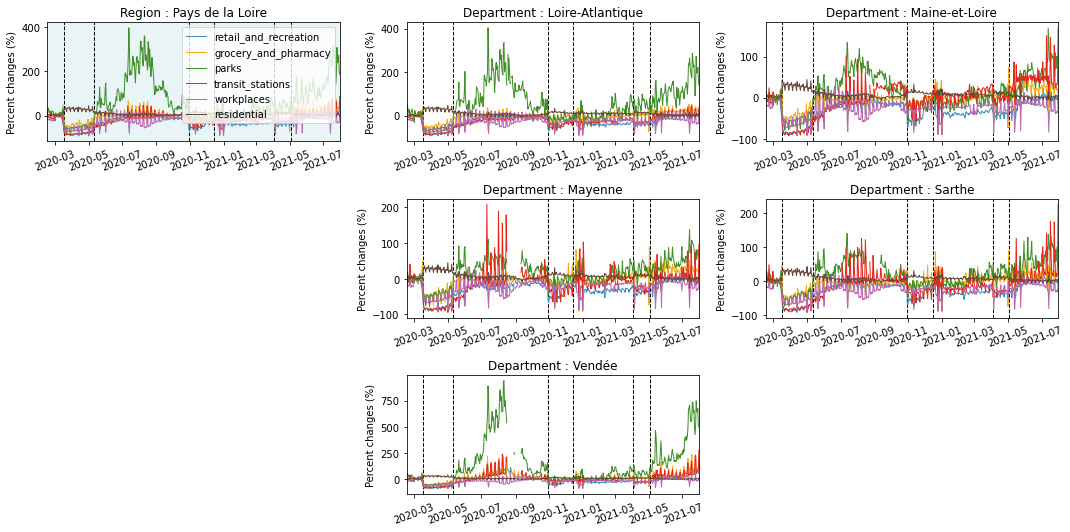

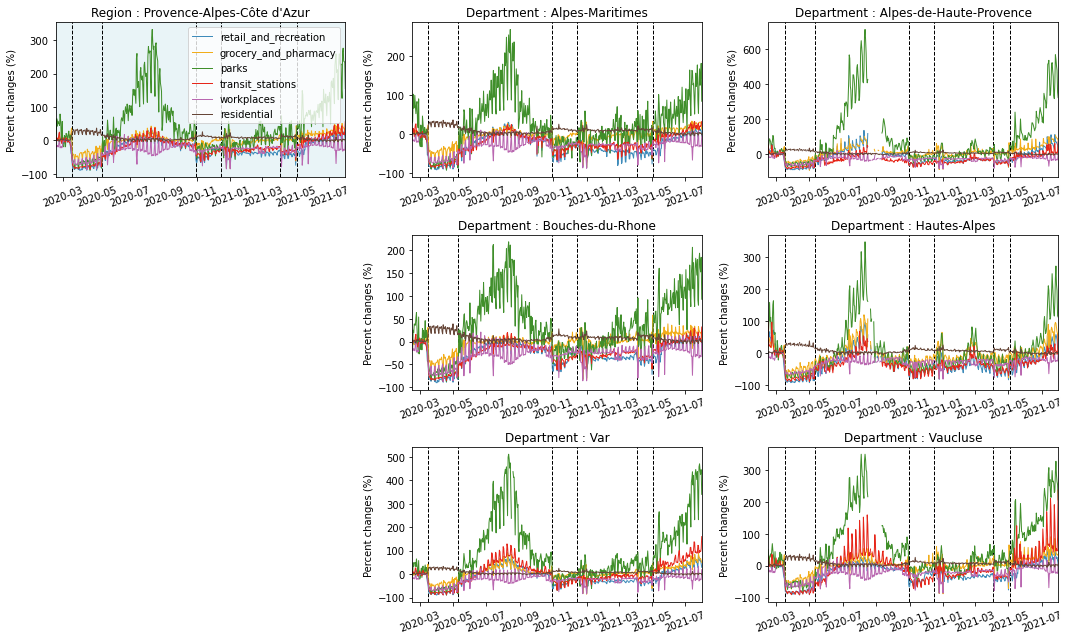

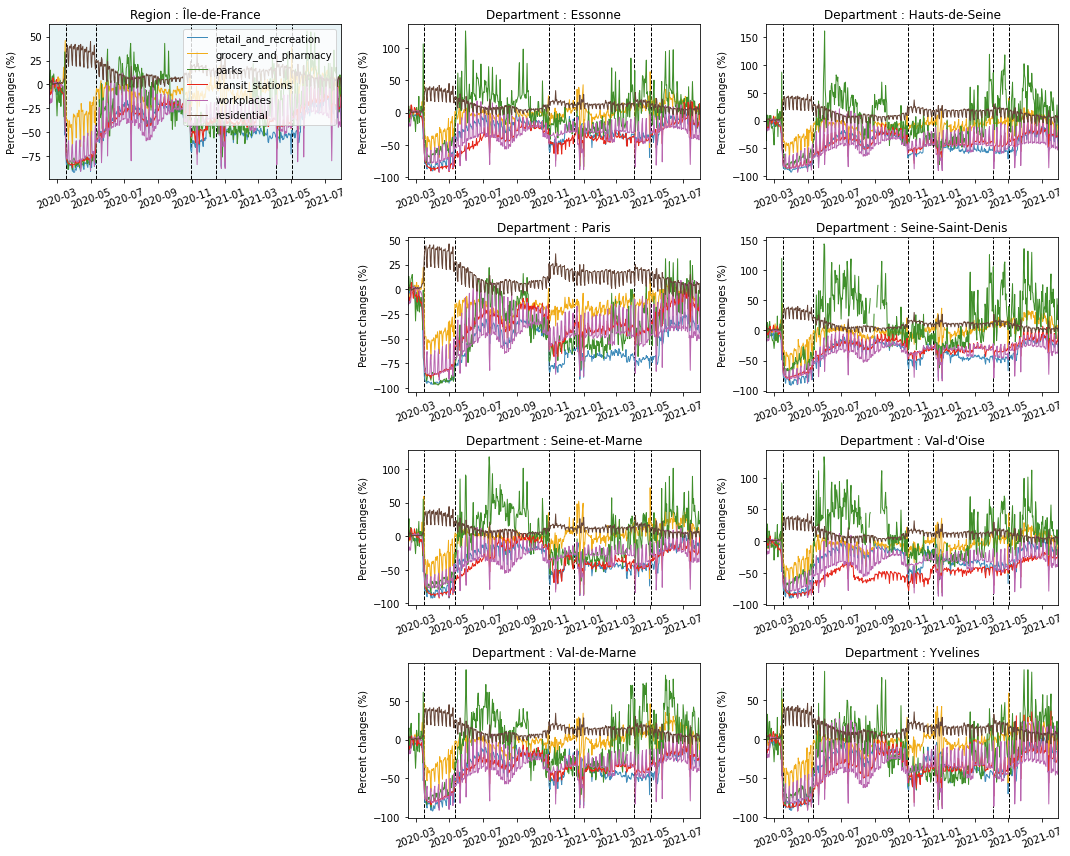

In [9]:
subplot_loc = [2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 20, 21, 23, 24, 26, 27]

sr1_name = list(set(data_region["sub_region_1"]))
sr1_name.sort()

for sr1 in sr1_name:
    data_sr1 = data_region.loc[data_region["sub_region_1"] == sr1]  # Toutes les données de la région et départements
    data_rg = data_sr1.loc[ data_sr1["sub_region_2"].isna() ] # Données sur l'ensemble de la région
    sr2_name = list(set(data_sr1["sub_region_2"]))[1:]
    sr2_name.sort()

    # Graphique sur la région
    plt.figure(figsize=(15,1.5*len(sr2_name)))
    ax = plt.subplot(ceil(len(sr2_name)/2), 3, 1)
    ax.set_facecolor('#E9F4F7')
    plt.plot(data_rg.index, data_rg["retail_and_recreation"], label="retail_and_recreation", color=colors[0], lw=1)
    plt.plot(data_rg.index, data_rg["grocery_and_pharmacy"], label="grocery_and_pharmacy", color=colors[1], lw=1)
    plt.plot(data_rg.index, data_rg["parks"], label="parks", color=colors[2], lw=1)
    plt.plot(data_rg.index, data_rg["transit_stations"], label="transit_stations", color=colors[3], lw=1)
    plt.plot(data_rg.index, data_rg["workplaces"], label="workplaces", color=colors[4], lw=1)
    plt.plot(data_rg.index, data_rg["residential"], label="residential", color=colors[5], lw=1)
    [plt.axvline(dates_tags[i], color="black", ls="--", lw=1, zorder=0) for i in range(len(dates_tags))]
    plt.legend(loc="upper right")
    plt.ylabel("Percent changes (%)")
    plt.xlim(data_rg.index[1], data_rg.index[-1])
    plt.xticks(rotation=20)
    plt.title("Region : {}".format(sr1))

    k = 0
    for i, sr2 in enumerate(sr2_name):
        data_dpt = data_sr1.loc[data_sr1["sub_region_2"] == sr2]  # Données d'un département
        
        # Graphique sur un département
        plt.subplot(ceil(len(sr2_name)/2), 3, subplot_loc[k])
        plt.plot(data_dpt.index, data_dpt["retail_and_recreation"], label="retail_and_recreation", color=colors[0], lw=1)
        plt.plot(data_dpt.index, data_dpt["grocery_and_pharmacy"], label="grocery_and_pharmacy", color=colors[1], lw=1)
        plt.plot(data_dpt.index, data_dpt["parks"], label="parks", color=colors[2], lw=1)
        plt.plot(data_dpt.index, data_dpt["transit_stations"], label="transit_stations", color=colors[3], lw=1)
        plt.plot(data_dpt.index, data_dpt["workplaces"], label="workplaces", color=colors[4], lw=1)
        plt.plot(data_dpt.index, data_dpt["residential"], label="residential", color=colors[5], lw=1)
        [plt.axvline(dates_tags[i], color="black", ls="--", lw=1, zorder=0) for i in range(len(dates_tags))]
        plt.ylabel("Percent changes (%)")
        plt.xlim(data_dpt.index[1], data_dpt.index[-1])
        plt.xticks(rotation=20)
        plt.title("Department : {}".format(sr2))
        k += 1
    
    plt.tight_layout() 